In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams['figure.facecolor'] = 'white'

In [21]:
# load data.xlsx

calibration_data = pd.read_excel('data.xlsx', sheet_name='calibration')
profile_data = pd.read_excel('data.xlsx', sheet_name='profile')

mmHg = 760

P_atm = mmHg * 9.80665 * 13545.848 / 1000
rho =  1.225
dyn_visc = 1.7894e-5

print(P_atm)

100957.93661979199


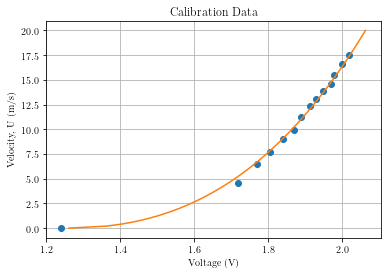

In [22]:

# plot calibration data

A	= 1.589867014
B	= 0.596894038

voltages = calibration_data['E (V)']
velocities = calibration_data['U (m/s)']

U = np.linspace(0, 20, 100)
E = np.sqrt(A + B * np.sqrt(U))

plt.plot(voltages, velocities, 'o')
plt.plot(E, U)
plt.xlabel('Voltage (V)')
plt.ylabel('Velocity, U (m/s)')
plt.grid()
plt.title('Calibration Data')

plt.savefig('calibration.png', dpi=600)
plt.show()

In [23]:
def setup_clauser_axis():

    fig = plt.figure(figsize=(9,6))
    im = plt.imread('clauser_back.jpg')

    # this axis is linear scale for image
    ax = fig.add_subplot(1,1,1)

    ax.imshow(im,  aspect='equal', alpha=0.7)
    plt.axis('off')

    # this axis is log scale
    newax = fig.add_axes(ax.get_position(), frameon=False)
    newax.set_ylim(0, 1)
    newax.set_xlim(1e2, 1e5)
    newax.set_xscale('log')

    return newax

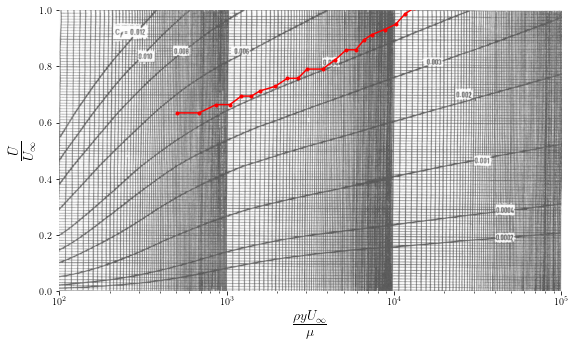

In [24]:

offset = 0.2 * 1e-3
distances = profile_data["Dist (mm)"] * 1e-3 + offset
u_mean = profile_data["u_bar (m/s)"]

dp = 100 * 0.68
U_inf = np.sqrt(2 * dp / rho)


clauser_x = rho * distances * U_inf / dyn_visc
clauser_y = u_mean / U_inf

ax = setup_clauser_axis()

ax.plot(clauser_x, clauser_y, "-o", 
           label="u_bar", 
           color='r',
           markersize=3,
           linewidth=1.5)

ax.set_xlabel(r'$\frac{\rho yU_\infty}{\mu}$', fontsize = 20)
ax.set_ylabel(r'$\frac{\bar{U}}{U_\infty}$', fontsize = 20)

plt.savefig('clauser_data.png', dpi=600)

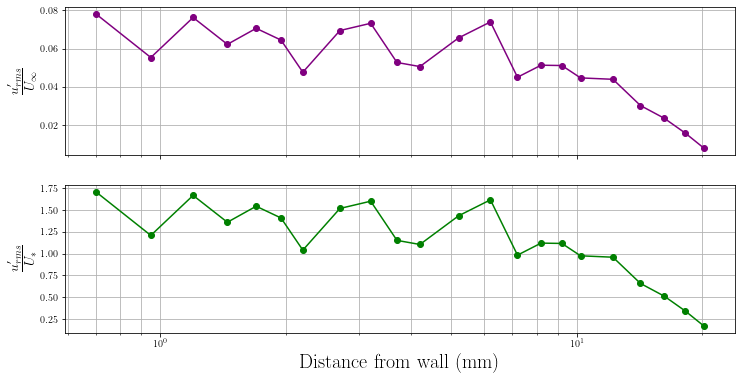

In [25]:
u_fluctuation = profile_data["u' (m/s)"]

Cf = 0.0042
U_star = np.sqrt( Cf * U_inf**2 / 2)

fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

axes[0].plot(
    distances * 1e3,
    u_fluctuation / U_inf,
    "-o",
    color = 'purple',
)
axes[1].plot(
    distances * 1e3,
    u_fluctuation / U_star,
    "-o",
    color = 'g',
)

axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[0].grid(which='both')
axes[1].grid(which='both')

axes[1].set_xlabel('Distance from wall (mm)', fontsize = 20)
axes[0].set_ylabel(r"$\frac{u'_{rms}}{U_\infty}$", fontsize = 20)
axes[1].set_ylabel(r"$\frac{u'_{rms}}{U_*}$", fontsize = 20)

plt.savefig('u_fluctuation.png', dpi=600)

plt.show()


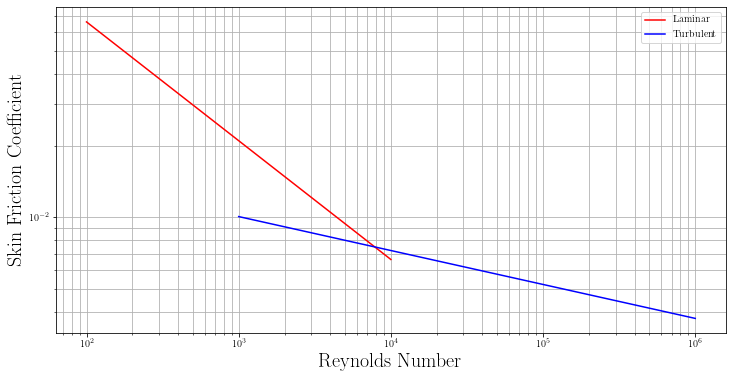

In [27]:

ReD_lam = np.logspace(2, 4, 1000)
Cf_lam = 0.664 / np.sqrt(ReD_lam)

ReD_turb = np.logspace(3, 6, 1000)
Cf_turb = 0.027 / (ReD_turb ** (1/7))

plt.figure(figsize=(12, 6))
plt.plot(ReD_lam, Cf_lam, label="Laminar", color='r')
plt.plot(ReD_turb, Cf_turb, label="Turbulent", color='b')

plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.xlabel('Reynolds Number', fontsize = 20)
plt.ylabel('Skin Friction Coefficient', fontsize = 20)
plt.legend()

plt.savefig('Cf.png', dpi=600)
plt.show()